In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the DataFrame from the CSV M_File
M_F3_WP = pd.read_csv('../experimental_data/M_F3_WP.csv')
M_F2_WP = pd.read_csv('../experimental_data/M_F2_WP.csv')
M_F7_WP = pd.read_csv('../experimental_data/M_F7_WP.csv')

M_F12_2h30_agar = pd.read_csv('../experimental_data/M_F12_2h30_agar.csv')
M_F17_2h30_agar = pd.read_csv('../experimental_data/M_F17_2h30_agar.csv')
M_F19_2h30_agar = pd.read_csv('../experimental_data/M_F19_2h30_agar.csv')
M_F11_2h30_agar = pd.read_csv('../experimental_data/M_F11_2h30_agar.csv')
M_F04_ctrl_2h30 = pd.read_csv('../experimental_data/M_F04_ctrl_2h30.csv')
M_F05_ctrl_2h30 = pd.read_csv('../experimental_data/M_F05_ctrl_2h30.csv')
M_F12_ctrl_2h30 = pd.read_csv('../experimental_data/M_F12_ctrl_2h30.csv')
M_F14_ctrl_2h30 = pd.read_csv('../experimental_data/M_F14_ctrl_2h30.csv')
M_F15_ctrl_2h30 = pd.read_csv('../experimental_data/M_F15_ctrl_2h30.csv')
M_F5_5h_ctrl = pd.read_csv('../experimental_data/M_F5_5h_ctrl.csv')
M_F29_5h_ctrl = pd.read_csv('../experimental_data/M_F29_5h_ctrl.csv')
M_F31_5h_ctrl = pd.read_csv('../experimental_data/M_F31_5h_ctrl.csv')
M_F6_5h_agar = pd.read_csv('../experimental_data/M_F6_5h_agar.csv')
M_F22_5h_agar = pd.read_csv('../experimental_data/M_F22_5h_agar.csv')
M_F20_5h_agar = pd.read_csv('../experimental_data/M_F20_5h_agar.csv')

In [75]:
from scipy.stats import kstest, mannwhitneyu, norm
import matplotlib.pyplot as plt

# Fonction pour filtrer les données
def clean_data(data):
    cleaned_data = []
    for x in data:
        if x is None or isinstance(x, (str, bool)) or x != x or x in (float('inf'), float('-inf')):
            continue
        cleaned_data.append(x)
    return cleaned_data

# Fonction pour effectuer les tests de normalité et de Mann-Whitney
def perform_tests(ctrl_data, agar_data, y_pos, star_pos):
    # Filtrer les données
    ctrl_data_clean = clean_data(ctrl_data)
    agar_data_clean = clean_data(agar_data)
    
    # Vérifier que les listes ne sont pas vides
    if len(ctrl_data_clean) == 0 or len(agar_data_clean) == 0:
        print("Les listes de données ne doivent pas être vides après nettoyage.")
        return
    
    # Vérifier que les listes ne contiennent pas des valeurs identiques
    if len(set(ctrl_data_clean)) == 1 or len(set(agar_data_clean)) == 1:
        print("Les listes de données ne doivent pas contenir uniquement des valeurs identiques.")
        return
    
    # Test de Mann-Whitney
    mannwhitney_result = mannwhitneyu(ctrl_data_clean, agar_data_clean, alternative='two-sided')

    print(f"Test de Mann-Whitney entre ctrl et agar : {mannwhitney_result}")

    if mannwhitney_result.pvalue < 0.05:
        plt.text(star_pos, y_pos, '***', fontsize=12)
    elif mannwhitney_result.pvalue < 0.01:
        plt.text(star_pos, y_pos, '****', fontsize=12)

In [76]:
from scipy.stats import shapiro, mannwhitneyu
import statsmodels.api as sm
import matplotlib.pyplot as plt
def perform_tests_ct(ctrl_data1, ctrl_data2, y_pos, star_pos):
    mannwhitney_result = mannwhitneyu([x for x in ctrl_data1 if x is not None],
                                      [x for x in ctrl_data2 if x is not None],
                                      alternative='two-sided')
    print(f"Test de Mann-Whitney entre ctrl et agar : {mannwhitney_result}")

    if mannwhitney_result.pvalue < 0.05:
        plt.text(star_pos, y_pos, '***', fontsize=12)
    elif mannwhitney_result.pvalue < 0.01:
        plt.text(star_pos, y_pos, '****', fontsize=12)

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conditions
conditions = ["0h", "2.5h ctrl", "2.5h agar", "5h ctrl", "5h agar"]

# Dictionnaire pour stocker les valeurs pour chaque condition
values_areas = {
    "0h": [],  
    "2.5h ctrl": [],
    "2.5h agar": [],
    "5h ctrl": [],
    "5h agar": [], 
}

values_areas["0h"].extend(M_F3_WP.area)
values_areas["0h"].extend(M_F2_WP.area)
values_areas["0h"].extend(M_F7_WP.area)
values_areas["2.5h ctrl"].extend(M_F04_ctrl_2h30.area)
values_areas["2.5h ctrl"].extend(M_F05_ctrl_2h30.area)
values_areas["2.5h ctrl"].extend(M_F12_ctrl_2h30.area)
values_areas["2.5h ctrl"].extend(M_F15_ctrl_2h30.area)
values_areas["2.5h agar"].extend(M_F12_2h30_agar.area)
values_areas["2.5h agar"].extend(M_F17_2h30_agar.area)
values_areas["2.5h agar"].extend(M_F11_2h30_agar.area)
values_areas["2.5h agar"].extend(M_F19_2h30_agar.area)
values_areas["5h ctrl"].extend(M_F5_5h_ctrl.area)
values_areas["5h ctrl"].extend(M_F31_5h_ctrl.area)
values_areas["5h ctrl"].extend(M_F29_5h_ctrl.area)
values_areas["5h agar"].extend(M_F6_5h_agar.area)
values_areas["5h agar"].extend(M_F22_5h_agar.area)
values_areas["5h agar"].extend(M_F20_5h_agar.area)
# Récupérer les longueurs maximales de toutes les listes de valeurs
max_length = max(len(values) for values in values_areas.values())

# Convertir les données en un format adapté pour seaborn
df_area_data = pd.DataFrame({key: values + [None] * (max_length - len(values)) for key, values in values_areas.items()})
df_area_data.to_csv('df_area_data', index=True)
# Créer le violon plot avec seaborn


/tmp/ipykernel_206685/16060430.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_filtered.columns, fontsize=11)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=4356.0, pvalue=1.3555892592150876e-06)
Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=5810.0, pvalue=0.07450173575296896)


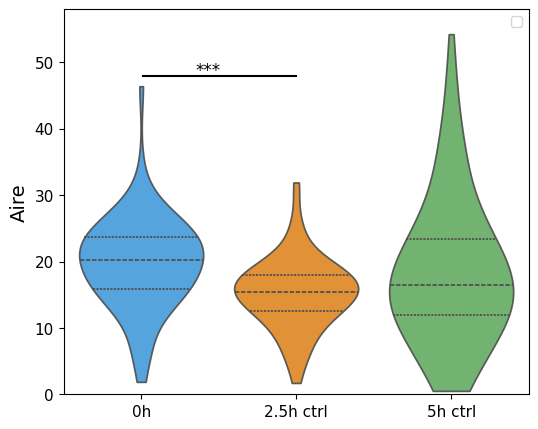

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Récupérer les longueurs maximales de toutes les listes de valeurs
max_length = max(len(values) for values in values_areas.values())

# Convertir les données en un format adapté pour seaborn
df_area_data = pd.DataFrame({key: values + [None] * (max_length - len(values)) for key, values in values_areas.items()})

# Sélectionner les colonnes désirées
df_filtered = df_area_data[["0h", "2.5h ctrl", "5h ctrl"]]

custom_palette = ["#289ef4ff", "#ff8800ff", "#59b756ff"] 
# Créer la figure et les sous-graphiques
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# Violin plot
sns.violinplot(data=df_filtered, bw_method=0.5, cut=0, inner="quartile", alpha=0.9, palette=custom_palette)
ax.set_ylabel('Aire', fontsize=14)
ax.set_xticklabels(df_filtered.columns, fontsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.set_ylim(0, 58)
ax.grid(False)

# Ajouter des barres entre les conditions
bar_positions = [(0.17, 0.5, 48)]
for (xmin, xmax, y) in bar_positions:
    plt.axhline(y=y, xmin=xmin, xmax=xmax, color='black', linestyle='-')

# Effectuer les tests pour les conditions 2.5h et 5h
#perform_tests(values_areas["2.5h ctrl"], values_areas["2.5h agar"], max(df_area_data.max()) - 35, 1.4)
#perform_tests(values_areas["5h ctrl"], values_areas["5h agar"], max(df_area_data.max()) - 70, 3.45)
perform_tests_ct(values_areas["0h"], values_areas["2.5h ctrl"], + 48 , 0.35)
perform_tests_ct(values_areas["2.5h ctrl"], values_areas["5h ctrl"], + 60, 1.4)


plt.legend()
plt.savefig('../image/M_plot_aire_in_vivo_violine.png', transparent=False)
plt.show()

Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=1884.0, pvalue=2.56542496272028e-12)


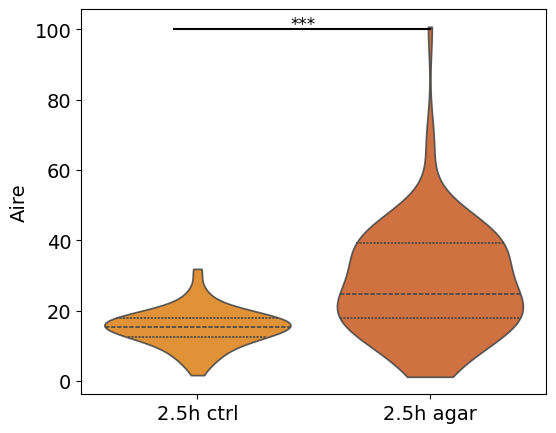

In [155]:
# Sélectionner les colonnes désirées
df_filtered = df_area_data[["2.5h ctrl", "2.5h agar"]]

# Définir les couleurs pour les violons
custom_palette = ["#ff8800ff", "#e65a11ff"]  # orange clair et orange foncé

plt.figure(figsize=(6, 5))
sns.violinplot(data=df_filtered, bw_method=0.5, cut=0, inner="quartile", alpha=0.9, palette=custom_palette)
plt.ylabel('Aire', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)# Rotation des étiquettes de l'axe x pour une meilleure lisibilité

# Ajouter des barres entre les conditions
bar_positions = [(0.2, 0.75, 100)]
for (xmin, xmax, y) in bar_positions:
    plt.axhline(y=y, xmin=xmin, xmax=xmax, color='black', linestyle='-')
# Effectuer les tests pour les conditions 2.5h et 5h
perform_tests(df_area_data["2.5h ctrl"], df_area_data["2.5h agar"], + 100, 0.4)
plt.savefig('../image/plot_aire_2_h_30_violine.png', transparent=False)
plt.show()

Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=4942.0, pvalue=0.047097350180586986)


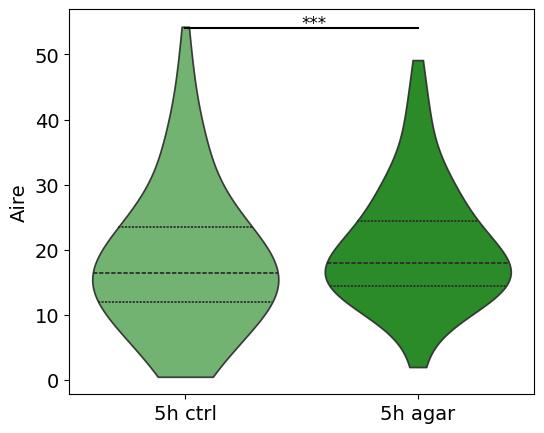

In [153]:
# Sélectionner les colonnes désirées
df_filtered = df_area_data[["5h ctrl", "5h agar"]]

custom_palette = ["#59b756ff", "#049000ff"]

plt.figure(figsize=(6, 5))
sns.violinplot(data=df_filtered, bw_method=0.5, cut=0, inner="quartile", alpha=0.9, palette=custom_palette)
plt.ylabel('Aire', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)# Rotation des étiquettes de l'axe x pour une meilleure lisibilité

#Ajouter des barres entre les conditions
bar_positions = [(0.25, 0.75, 54)]
for (xmin, xmax, y) in bar_positions:
    plt.axhline(y=y, xmin=xmin, xmax=xmax, color='black', linestyle='-')
# Effectuer les tests pour les conditions 5h
perform_tests(df_area_data["5h ctrl"], df_area_data["5h agar"], + 54, 0.5)
plt.savefig('../image/plot_area_5h_violine.png', transparent=False)
plt.show()

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

values_aniso = {
    "0h": [],  
    "2.5h ctrl": [],
    "2.5h agar": [],
    "5h ctrl": [],
    "5h agar": [], 
}

values_aniso["0h"].extend(M_F3_WP.aniso)
values_aniso["0h"].extend(M_F2_WP.aniso)
values_aniso["0h"].extend(M_F7_WP.aniso)
values_aniso["2.5h ctrl"].extend(M_F04_ctrl_2h30.aniso)
values_aniso["2.5h ctrl"].extend(M_F05_ctrl_2h30.aniso)
values_aniso["2.5h ctrl"].extend(M_F12_ctrl_2h30.aniso)
values_aniso["2.5h ctrl"].extend(M_F15_ctrl_2h30.aniso)
values_aniso["2.5h agar"].extend(M_F12_2h30_agar.aniso)
values_aniso["2.5h agar"].extend(M_F17_2h30_agar.aniso)
values_aniso["2.5h agar"].extend(M_F11_2h30_agar.aniso)
values_aniso["2.5h agar"].extend(M_F19_2h30_agar.aniso)
values_aniso["5h ctrl"].extend(M_F31_5h_ctrl.aniso)
values_aniso["5h ctrl"].extend(M_F5_5h_ctrl.aniso)
values_aniso["5h ctrl"].extend(M_F29_5h_ctrl.aniso)
values_aniso["5h agar"].extend(M_F6_5h_agar.aniso)
values_aniso["5h agar"].extend(M_F22_5h_agar.aniso)
values_aniso["5h agar"].extend(M_F20_5h_agar.aniso)

Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=2825.0, pvalue=0.5299947994646835)
Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=8638.0, pvalue=0.0002874416719964355)


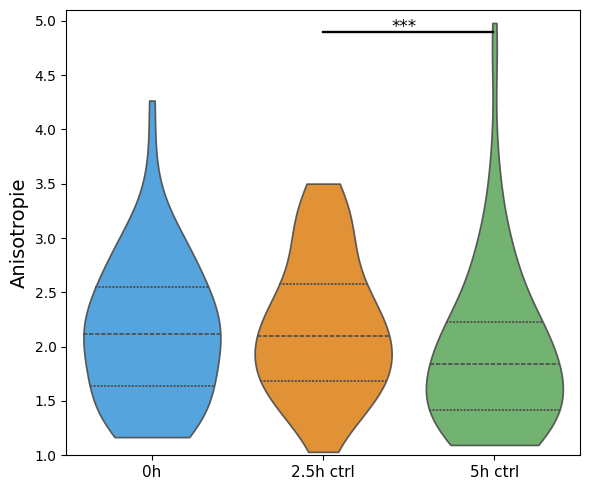

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Récupérer les longueurs maximales de toutes les listes de valeurs
max_length = max(len(values) for values in values_aniso.values())

# Convertir les données en un M_Format adapté pour seaborn
df_aniso_data = pd.DataFrame({key: values + [None] * (max_length - len(values)) for key, values in values_aniso.items()})
df_aniso_data.to_csv('df_aniso_data.csv', index=True)
# Sélectionner les colonnes désirées
df_filtered = df_aniso_data[["0h", "2.5h ctrl", "5h ctrl"]]

custom_palette = ["#289ef4ff", "#ff8800ff", "#59b756ff"] 
# Créer la figure et les sous-graphiques
fig, axs = plt.subplots(1, 1, figsize=(6, 5))

# Violin plot
sns.violinplot(data=df_filtered, bw_method=0.5, cut=0, inner="quartile", alpha=0.9, palette=custom_palette)
plt.ylabel('Anisotropie', fontsize=14)
plt.xticks(fontsize=11)
plt.xticks(fontsize=11)
plt.ylim(1, 5.1)

# Ajouter des barres entre les conditions
bar_positions = [(0.5, 0.83, 4.9)]
for (xmin, xmax, y) in bar_positions:
    plt.axhline(y=y, xmin=xmin, xmax=xmax, color='black', linestyle='-')
    plt.axhline(y=y, xmin=xmin, xmax=xmax, color='black', linestyle='-')
    plt.axhline(y=y, xmin=xmin, xmax=xmax, color='black', linestyle='-')
    plt.axhline(y=y, xmin=xmin, xmax=xmax, color='black', linestyle='-')
   
# Effectuer les tests pour les conditions 2.5h et 5h
#perform_tests(values_aniso["2.5h ctrl"], values_aniso["2.5h agar"], max(df_aniso_data.max()) + 0.6, 1.4)
perform_tests_ct(values_aniso["0h"], values_aniso["2.5h ctrl"], 0, 0.35)
perform_tests_ct(values_aniso["2.5h ctrl"], values_aniso["5h ctrl"], + 4.9 , 1.4)
#perform_tests(values_aniso["5h ctrl"], values_aniso["5h agar"], max(df_aniso_data.max()) + 0.05, 3.45)

plt.tight_layout()  # Ajuster automatiquement la disposition des sous-graphiques pour éviter le chevauchement

plt.savefig('../image/plot_aniso_in vivo_violine.png', transparent=False)
plt.show()


Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=5712.0, pvalue=0.00283964791377787)


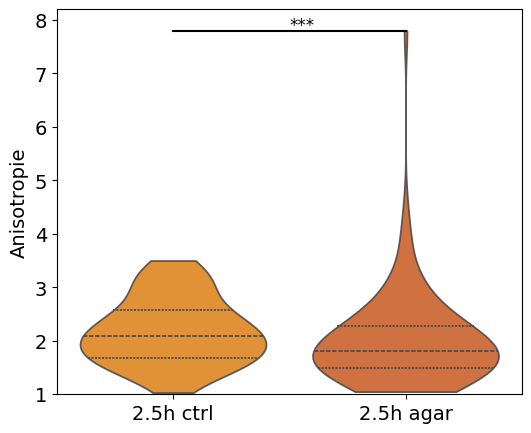

In [138]:
# Sélectionner les colonnes désirées
df_filtered = df_aniso_data[["2.5h ctrl", "2.5h agar"]]

# Définir les couleurs pour les violons
custom_palette = ["#ff8800ff", "#e65a11ff"]  # orange clair et orange foncé

plt.figure(figsize=(6, 5))
sns.violinplot(data=df_filtered, bw_method=0.5, cut=0, inner="quartile", alpha=0.9, palette=custom_palette)
plt.ylabel('Anisotropie', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.ylim(1, 8.2)
# Ajouter des barres entre les conditions
bar_positions = [(0.25, 0.75, 7.8)]
for (xmin, xmax, y) in bar_positions:
    plt.axhline(y=y, xmin=xmin, xmax=xmax, color='black', linestyle='-')
#Effectuer les tests pour les conditions 2.5h et 5h
perform_tests(values_aniso["2.5h ctrl"], values_aniso["2.5h agar"], + 7.8, 0.5)
#perform_tests(values_perimeter["5h ctrl"], values_perimeter["5h agar"], + 8.5, 2)
plt.savefig('../image/plot_aniso_2_h_30_violine.png', transparent=False)
plt.show()

Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=3858.0, pvalue=2.0730496117384445e-05)


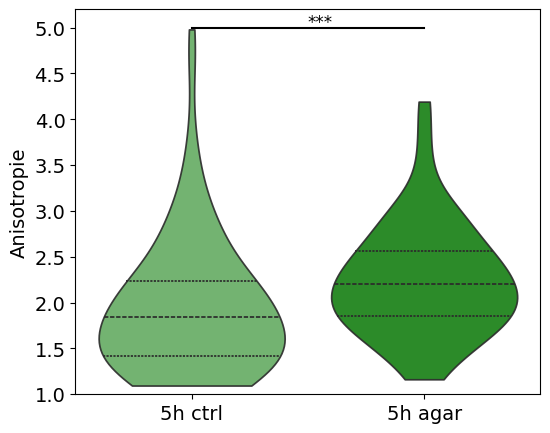

In [143]:
# Sélectionner les colonnes désirées
df_filtered = df_aniso_data[["5h ctrl", "5h agar"]]

# Définir les couleurs pour les violons
custom_palette = ["#59b756ff", "#049000ff"]

plt.figure(figsize=(6, 5))
sns.violinplot(data=df_filtered, bw_method=0.5, cut=0, inner="quartile", alpha=0.9, palette=custom_palette)
plt.ylabel('Anisotropie', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.ylim(1, 5.2)
# Ajouter des barres entre les conditions
bar_positions = [(0.25, 0.75, 5)]
for (xmin, xmax, y) in bar_positions:
    plt.axhline(y=y, xmin=xmin, xmax=xmax, color='black', linestyle='-')
# Effectuer les tests pour les conditions 5h
perform_tests(df_aniso_data["5h ctrl"], df_aniso_data["5h agar"], + 5, 0.5)
plt.savefig('../image/plot_aniso_5h_violine.png', transparent=False)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

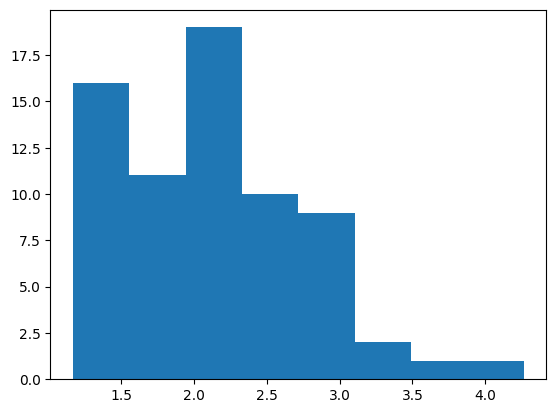

In [42]:
plt.hist(values_aniso["0h"], bins="auto")
plt.show

In [89]:
values_perimeter = {
    "0h": [],  
    "2.5h ctrl": [],
    "2.5h agar": [],
    "5h ctrl": [],
    "5h agar": [], 
}
values_perimeter["0h"].extend(M_F3_WP.perimeter)
values_perimeter["0h"].extend(M_F2_WP.perimeter)
values_perimeter["0h"].extend(M_F7_WP.perimeter)
values_perimeter["2.5h ctrl"].extend(M_F04_ctrl_2h30.perimeter)
values_perimeter["2.5h ctrl"].extend(M_F05_ctrl_2h30.perimeter)
values_perimeter["2.5h ctrl"].extend(M_F12_ctrl_2h30.perimeter)
values_perimeter["2.5h ctrl"].extend(M_F14_ctrl_2h30.perimeter)
values_perimeter["2.5h agar"].extend(M_F12_2h30_agar.perimeter)
values_perimeter["2.5h agar"].extend(M_F17_2h30_agar.perimeter)
values_perimeter["2.5h agar"].extend(M_F11_2h30_agar.perimeter)
values_perimeter["2.5h agar"].extend(M_F19_2h30_agar.perimeter)
values_perimeter["5h ctrl"].extend(M_F5_5h_ctrl.perimeter)
values_perimeter["5h ctrl"].extend(M_F29_5h_ctrl.perimeter)
values_perimeter["5h ctrl"].extend(M_F31_5h_ctrl.perimeter)
values_perimeter["5h agar"].extend(M_F6_5h_agar.perimeter)
values_perimeter["5h agar"].extend(M_F22_5h_agar.perimeter)
values_perimeter["5h agar"].extend(M_F20_5h_agar.perimeter)

Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=4187.0, pvalue=4.7224590974941476e-05)
Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=6318.0, pvalue=0.3409607804874356)


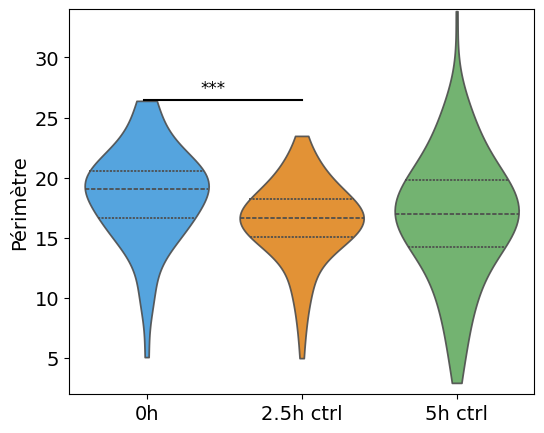

In [146]:
# Récupérer les longueurs maximales de toutes les listes de valeurs
max_length = max(len(values) for values in values_perimeter.values())

# Convertir les données en un format adapté pour seaborn
df_peri_data = pd.DataFrame({key: values + [None] * (max_length - len(values)) for key, values in values_perimeter.items()})
df_peri_data.to_csv('df_peri_data', index=True)
# Créer le violon plot avec seaborn

# Sélectionner les colonnes désirées
df_filtered = df_peri_data[["0h", "2.5h ctrl", "5h ctrl"]]
custom_palette = ["#289ef4ff", "#ff8800ff", "#59b756ff"] 
plt.figure(figsize=(6, 5))
sns.violinplot(data=df_filtered, bw_method=0.5, cut=0, inner="quartile", alpha=0.9, palette=custom_palette)
plt.ylabel('Périmètre', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.ylim(2, 34)

# Ajouter des barres entre les conditions
bar_positions = [(0.16, 0.5, 26.5)]
for (xmin, xmax, y) in bar_positions:
    plt.axhline(y=y, xmin=xmin, xmax=xmax, color='black', linestyle='-')

# Effectuer les tests pour les conditions 2.5h et 5h
#perform_tests(values_perimeter["2.5h ctrl"], values_perimeter["2.5h agar"], + 3, 1.4)
#perform_tests(values_perimeter["5h ctrl"], values_perimeter["5h agar"], + 4, 3.45)
perform_tests_ct(values_perimeter["0h"], values_perimeter["2.5h ctrl"], + 27, 0.35)
perform_tests_ct(values_perimeter["2.5h ctrl"], values_perimeter["5h ctrl"],  + 31, 1.4)

plt.savefig('../image/plot_perimeter_in_vivo_morp_violine.png', transparent=False)
plt.show()


Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=1973.0, pvalue=7.52044551307645e-12)


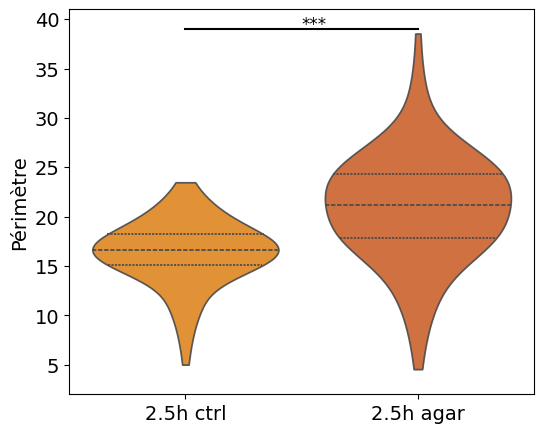

In [148]:
# Sélectionner les colonnes désirées
df_filtered = df_peri_data[["2.5h ctrl", "2.5h agar"]]

# Définir les couleurs pour les violons
custom_palette = ["#ff8800ff", "#e65a11ff"]  # orange clair et orange foncé

plt.figure(figsize=(6, 5))
sns.violinplot(data=df_filtered, bw_method=0.5, cut=0, inner="quartile", alpha=0.9, palette=custom_palette)
plt.ylabel('Périmètre', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.ylim(2, 41)
# Ajouter des barres entre les conditions
bar_positions = [(0.25, 0.75, 39)]
for (xmin, xmax, y) in bar_positions:
    plt.axhline(y=y, xmin=xmin, xmax=xmax, color='black', linestyle='-')
# Effectuer les tests pour les conditions 2.5h et 5h
perform_tests(values_perimeter["2.5h ctrl"], values_perimeter["2.5h agar"], + 39, 0.5)
#perform_tests(values_perimeter["5h ctrl"], values_perimeter["5h agar"], + 4, 3.45)
plt.savefig('../image/plot_perimeter_2_h_30_violine.png', transparent=False)
plt.show()

Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=4201.0, pvalue=0.000402955886072123)


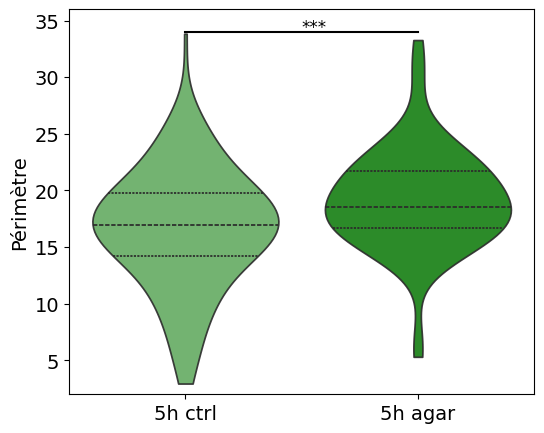

In [149]:
# Sélectionner les colonnes désirées
df_filtered = df_peri_data[["5h ctrl", "5h agar"]]

custom_palette = ["#59b756ff", "#049000ff"]

plt.figure(figsize=(6, 5))
sns.violinplot(data=df_filtered, bw_method=0.5, cut=0, inner="quartile", alpha=0.9, palette=custom_palette)
plt.ylabel('Périmètre', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.ylim(2, 36)
# Ajouter des barres entre les conditions
bar_positions = [(0.25, 0.75, 34)]
for (xmin, xmax, y) in bar_positions:
    plt.axhline(y=y, xmin=xmin, xmax=xmax, color='black', linestyle='-')
# Effectuer les tests pour les conditions 2.5h et 5h
#perform_tests(values_perimeter["2.5h ctrl"], values_perimeter["2.5h agar"], + 3, 0.5)
perform_tests(values_perimeter["5h ctrl"], values_perimeter["5h agar"], + 34, 0.5)
plt.savefig('../image/plot_perimeter_5h_violine.png', transparent=False)
plt.show()